# MLP

**Participants:**
- Roger Baiges Trilla
- Lluc Furriols 

**Subject:**
- Xarxes Neuronals i Deep Learning

**Course:** 2024

**Degree:** Intel·ligència Artificial


### BASIC IMPORTS

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing

In this section the preprocessing of the data will be done. The data will be loaded, the missing values will be handled, the data will be cleaned and the data will be transformed to be used in the model.

In [63]:
# Load the data from the assets folder

rain_data = pd.read_csv('../assets/rain_data.csv')
print(f'Shape of the data: {rain_data.shape}')
rain_data.head()

Shape of the data: (67021, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes


In [64]:
print(rain_data.dtypes)
rain_data.describe()

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,65864.000000,65940.000000,64271.000000,37591.000000,34831.000000,61576.000000,65971.000000,65328.000000,65257.000000,64388.000000,59750.000000,59761.000000,41303.000000,40071.000000,65689.000000,64811.000000
mean,12.552091,22.480866,3.669512,5.122383,6.514499,42.142150,14.634764,19.187194,72.074781,57.521433,1016.524147,1014.237604,5.053870,5.184148,16.888700,20.822340
std,6.371143,7.108686,10.981571,3.950017,3.932475,14.638665,9.227585,9.171806,18.481003,21.741282,7.343975,7.283068,2.778949,2.620094,6.427827,6.931696
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,8.000000,17.200000,0.000000,2.400000,3.200000,31.000000,7.000000,13.000000,61.000000,42.000000,1011.700000,1009.300000,2.000000,3.000000,12.200000,15.800000
50%,12.300000,21.800000,0.000000,4.400000,6.800000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,6.000000,6.000000,16.500000,20.100000
75%,17.200000,27.400000,2.200000,7.000000,9.900000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.500000,1019.200000,7.000000,7.000000,21.400000,25.500000
max,33.900000,47.300000,371.000000,77.300000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.300000,1038.500000,8.000000,8.000000,39.000000,46.700000


## CREATING NEW VARIABLES

From the variable date we can create new variables like Monty, Day, Year in order to make easier for the models to understand a date format.

In [65]:
# Create new variable from the date column

rain_data['Date'] = pd.to_datetime(rain_data['Date'])
rain_data['Month'] = rain_data['Date'].dt.month
rain_data['Day'] = rain_data['Date'].dt.day
rain_data['Year'] = rain_data['Date'].dt.year
rain_data.drop('Date', axis=1, inplace=True)

We can also create new variables through different combinations of the ones we already have.

In [66]:
# Create 'Temp_difference' - difference between the maximum and minimum temperature of the day
rain_data['Temp_difference'] = rain_data['MaxTemp'] - rain_data['MinTemp']

# Create 'Humidity_difference' - difference between morning and afternoon humidity
rain_data['Humidity_difference'] = rain_data['Humidity9am'] - rain_data['Humidity3pm']

# Create 'Pressure_difference' - difference between morning and afternoon pressure
rain_data['Pressure_difference'] = rain_data['Pressure9am'] - rain_data['Pressure3pm']

# Create 'WindSpeed_difference' - difference between morning and afternoon wind speed
rain_data['WindSpeed_difference'] = rain_data['WindSpeed9am'] - rain_data['WindSpeed3pm']

# Add a print statement to show the shape of the DataFrame and the newly added columns
print("Shape of the data:", rain_data.shape)
print("Newly added columns:", [col for col in rain_data.columns if 'difference' in col or 'TotalSunshine' in col or 'IsRainyDay' in col])


Shape of the data: (67021, 29)
Newly added columns: ['Temp_difference', 'Humidity_difference', 'Pressure_difference', 'WindSpeed_difference']


# Missing values

It is crutial to fix missing values using advanced imputation methods or by just simply deleting some rows in order to train the models.

,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,1157,1.726325,float64
MaxTemp,1081,1.612927,float64
Rainfall,2750,4.103192,float64
Evaporation,29430,43.911610,float64
Sunshine,32190,48.029722,float64
WindGustDir,5487,8.186986,object
WindGustSpeed,5445,8.124319,float64
WindDir9am,4751,7.088823,object
WindDir3pm,2288,3.413855,object


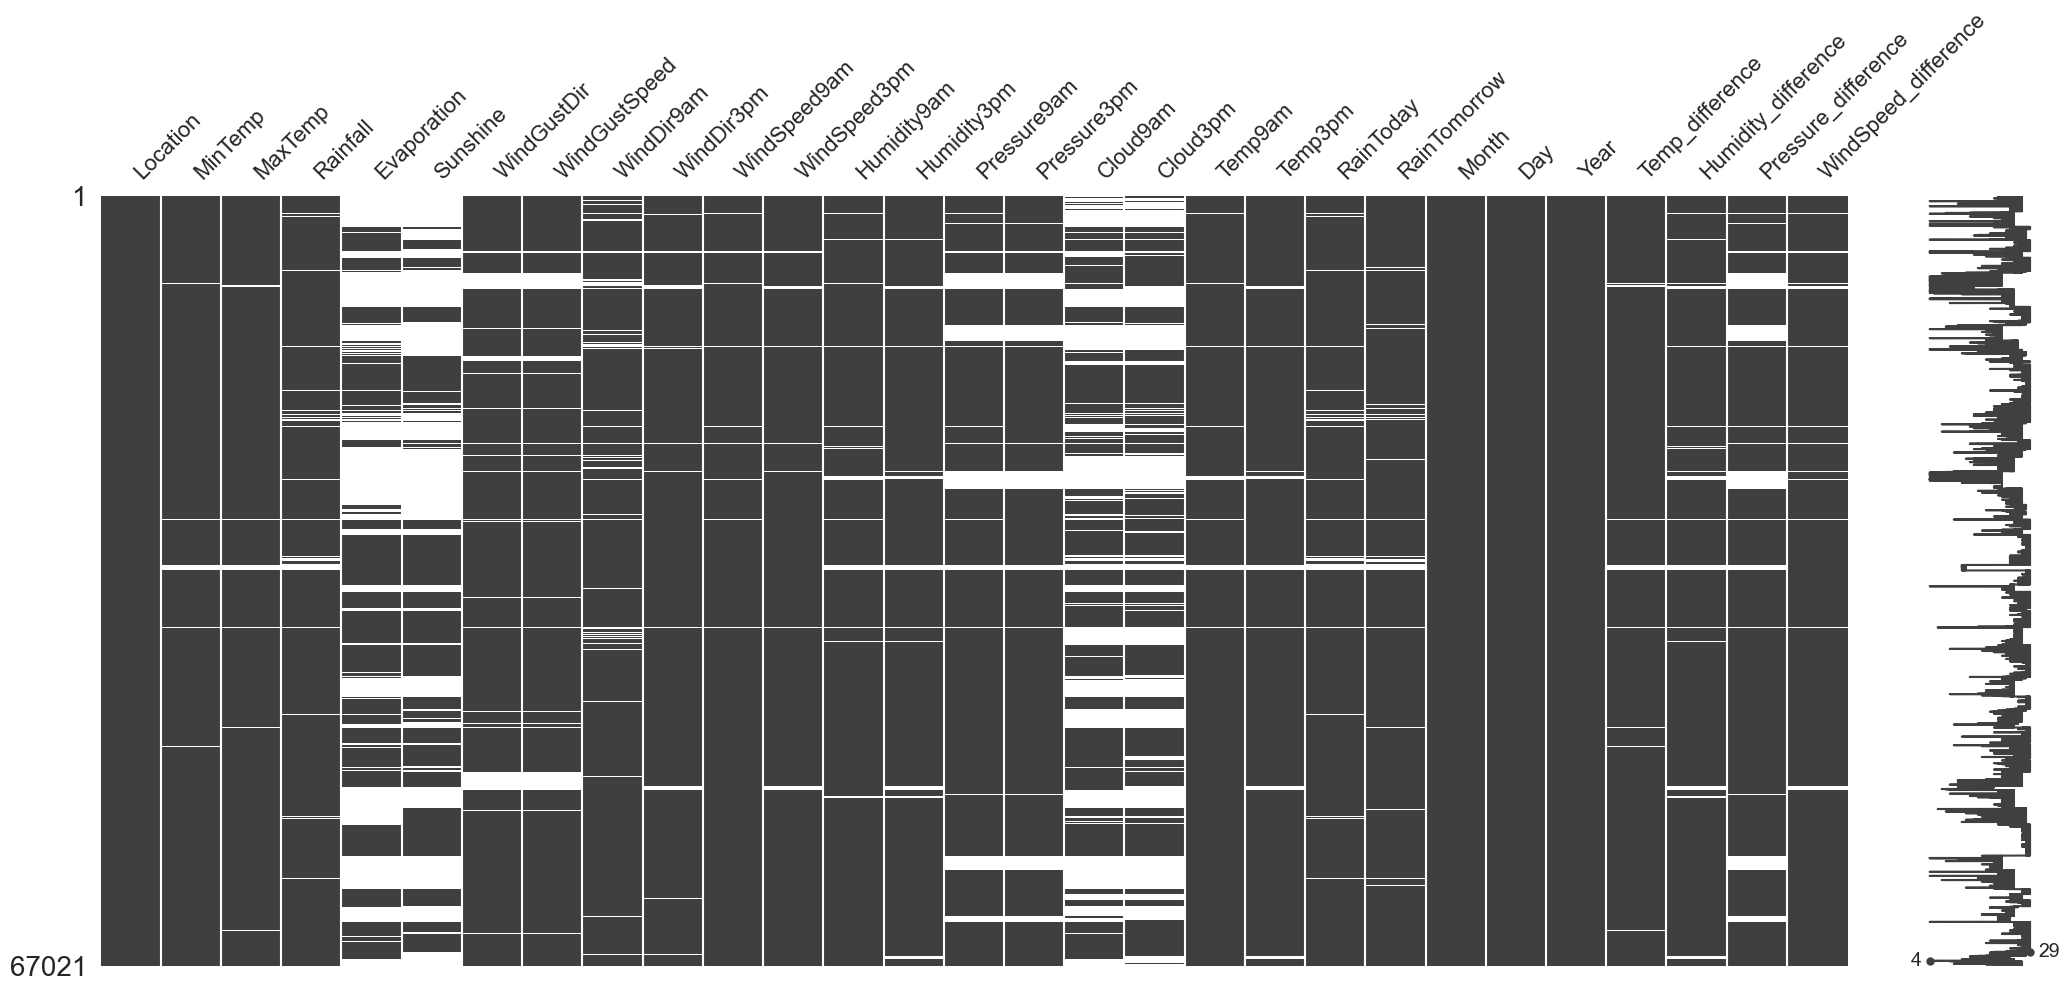

In [67]:
import missingno as msno

# Visualize the missing values as a matrix

msno.matrix(rain_data)

def create_missing_data_frame(data):
    """
    Function to create a table with missing data

    Args:
    -----
    data : The data frame to be used

    Returns:
    --------
    frame : The table with missing data
    """
    # Create a table with data missing 
    missing_values=data.isnull().sum() # missing values

    percent_missing = data.isnull().sum()/data.shape[0]*100 # missing value %

    value = {
        'missing_values ':missing_values,
        'percent_missing %':percent_missing , 
        'data type' : data.dtypes
    }
    frame=pd.DataFrame(value)
    return frame

missing_data=create_missing_data_frame(rain_data)
missing_data

### DELETE SOME MISSING VALUES

As seen above there are some variables with more than 40% of missing data, this is not imputable as we would add a lot of noise and the models would be learning through noise so we will just delete some rows.

First the missing values from the target variable 'RainTomorrow' will be deleted in order to not training models with fake data.

Then the 60% of rows with missing values in both 'Evaporation' and 'Sunshine' will be deleted.

Then the 60% of rows with missing values in both 'Cloud9am' and 'Cloud3pm' will be deleted.

Shape of the data: (41466, 29)


,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,121,0.291805,float64
MaxTemp,69,0.166401,float64
Rainfall,347,0.836830,float64
Evaporation,7606,18.342739,float64
Sunshine,9951,23.997974,float64
WindGustDir,3121,7.526648,object
WindGustSpeed,3103,7.483239,float64
WindDir9am,1860,4.485603,object
WindDir3pm,876,2.112574,object


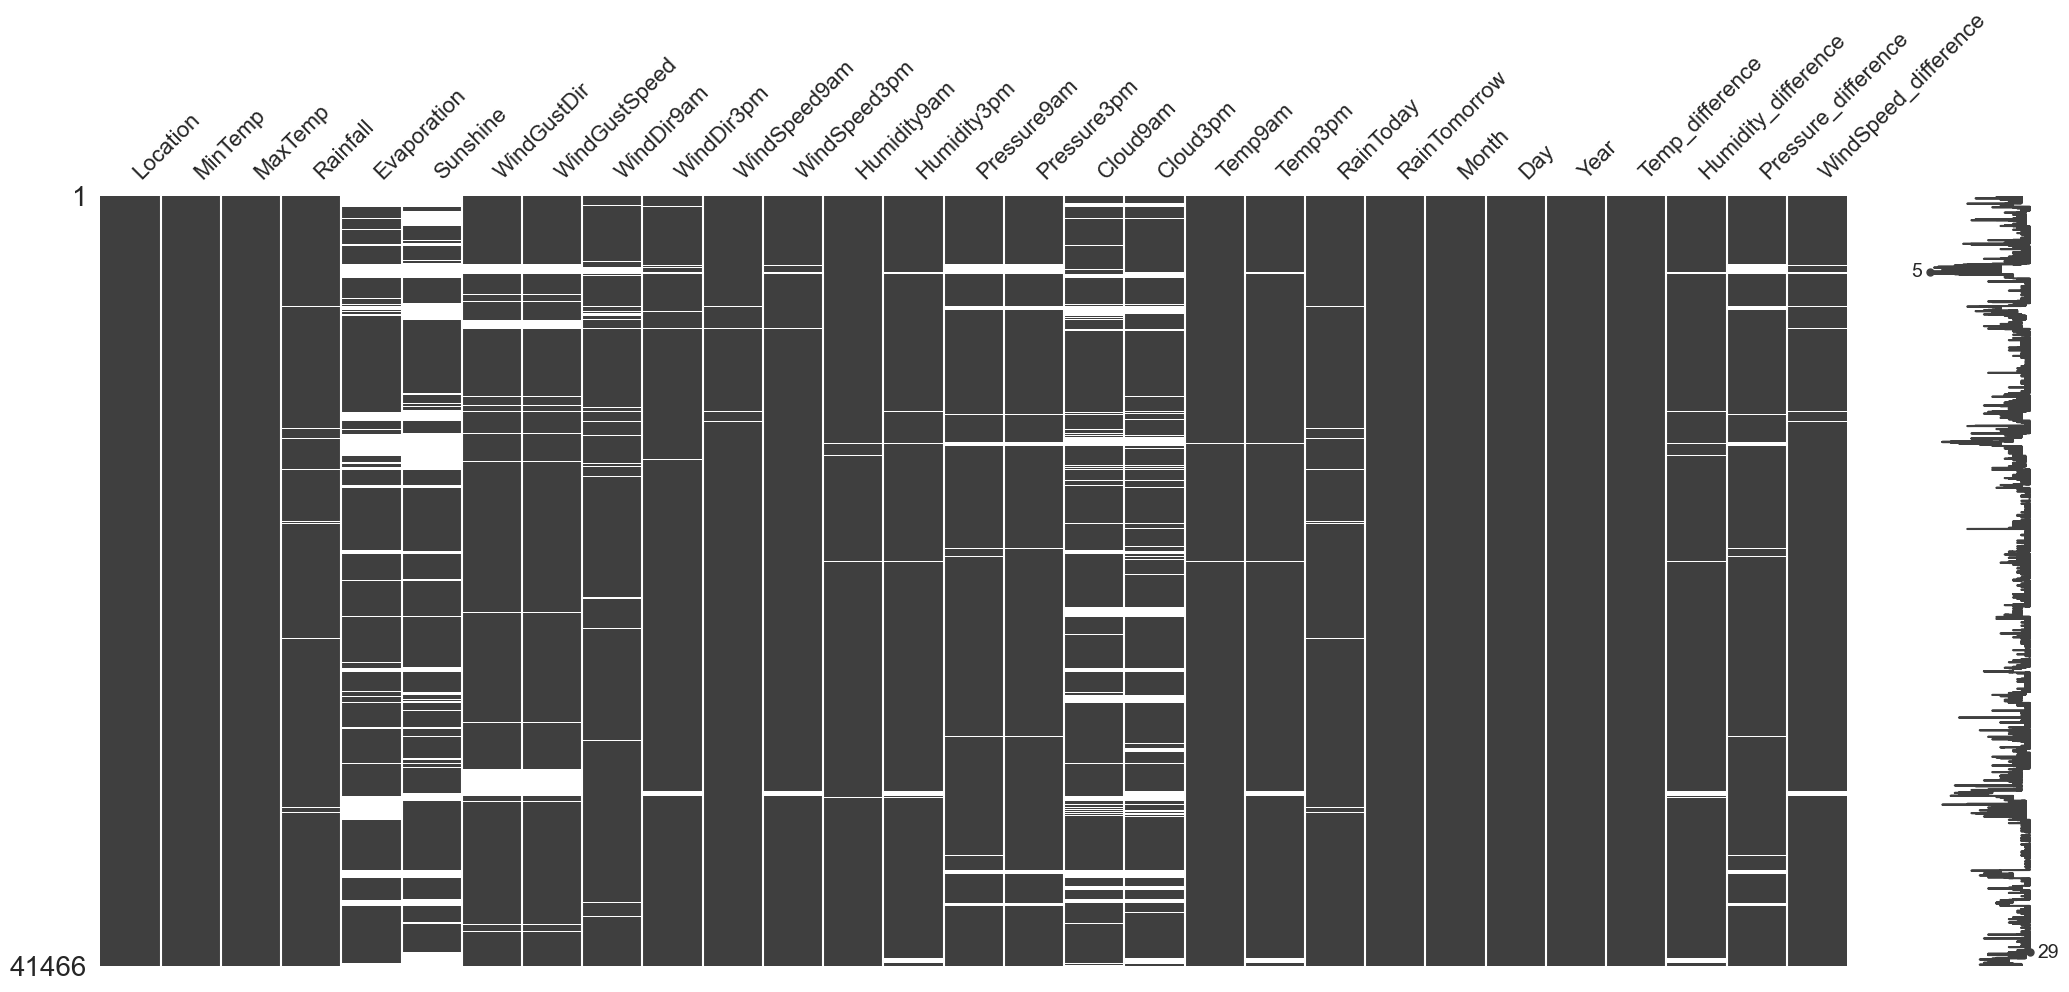

In [68]:
# Deleting the rows with missing values in the target variable RainTomorrow

rain_data.dropna(subset=['RainTomorrow'], inplace=True)


# Find the rows with missing values in the variables Evaporation and Sunshine

mask_evaporation_sunshine = rain_data['Evaporation'].isna() & rain_data['Sunshine'].isna()
indices_with_na_ES = rain_data[mask_evaporation_sunshine].index # Select the indexes of the rows with missing values
num_to_remove = int(0.6 * len(indices_with_na_ES)) # Calculate the number of rows to remove
indices_to_remove_ES = np.random.choice(indices_with_na_ES, num_to_remove, replace=False) # Select randomly the indexes of the rows to remove
rain_data.drop(indices_to_remove_ES, inplace=True) # Remove the rows with missing values



# Doing the same for the variables Cloud9am and Cloud3pm

mask_cloud9am_cloud3pm = rain_data['Cloud9am'].isna() & rain_data['Cloud3pm'].isna()
indices_with_na_CC = rain_data[mask_cloud9am_cloud3pm].index
num_to_remove = int(0.6 * len(indices_with_na_CC))
indices_to_remove_CC = np.random.choice(indices_with_na_CC, num_to_remove, replace=False)
rain_data.drop(indices_to_remove_CC, inplace=True)
                    


msno.matrix(rain_data)
missing_data = create_missing_data_frame(rain_data)
print(f'Shape of the data: {rain_data.shape}')
missing_data

# Impute the rest of values

Creating a function to impute the rest of the missing values using the IterativeImputer with KNN as estimator for the numerical variables and a Random Forest for the imputation of the categorical variables.

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_dataset(train_data, test_data):
    """
    Impute missing values in both training and test datasets.

    Args:
    --------
    train_data: DataFrame containing the training data.
    test_data: DataFrame containing the test data.
    
    Returns:
    --------
    train_imputed: Training data with imputed values.
    test_imputed: Test data with imputed values, using the same imputer as training.
    """
    # Separate the features into numerical and categorical
    categorical_cols = train_data.select_dtypes(include=['object']).columns
    numerical_cols = train_data.select_dtypes(exclude=['object']).columns
    
    # Create copies of the original dataframes to avoid changing the original data
    train_imputed = train_data.copy()
    test_imputed = test_data.copy()
    
    # Imputation for numerical variables using MICE with KNN
    mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(), initial_strategy='median', max_iter=50, tol=0.01, random_state=42)
    train_imputed[numerical_cols] = mice_imputer.fit_transform(train_imputed[numerical_cols])
    test_imputed[numerical_cols] = mice_imputer.transform(test_imputed[numerical_cols])
    
    # Round Cloud9am and Cloud3pm after imputation for better interpretation
    cloud_cols = ['Cloud9am', 'Cloud3pm']
    for col in cloud_cols:
        train_imputed[col] = train_imputed[col].apply(lambda x: min(8, max(0, round(x))))
        test_imputed[col] = test_imputed[col].apply(lambda x: min(8, max(0, round(x))))
    
    # Imputation for categorical variables using Random Forest
    for column in categorical_cols:
        rf_imputer = RandomForestClassifier(n_estimators=100, random_state=42)
        if not train_imputed[train_imputed[column].notna()].empty:
            rf_imputer.fit(train_imputed[train_imputed[column].notna()].drop(columns=categorical_cols), train_imputed[train_imputed[column].notna()][column])
            
            # Impute training data if there are NaNs
            if train_imputed[column].isna().any():
                train_imputed.loc[train_imputed[column].isna(), column] = rf_imputer.predict(train_imputed[train_imputed[column].isna()].drop(columns=categorical_cols))
            
            # Impute test data if there are NaNs
            if test_imputed[column].isna().any():
                test_imputed.loc[test_imputed[column].isna(), column] = rf_imputer.predict(test_imputed[test_imputed[column].isna()].drop(columns=categorical_cols))

    
    return train_imputed, test_imputed

## EVALUATE THE QUALITY OF THE IMPUTATION BY CREATING FAKE MISSINGS

In order to know if the imputation is working correctly we will create fake missing values and then impute them to see if the imputation is working correctly.

In [70]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

def hide_data(df, columns_to_exclude, hide_ratio=0.1):
    """
    Randomly hides data in the DataFrame based on the specified ratio,
    except for the specified columns.

    Args:
    -----
    df (DataFrame): The DataFrame to hide data from.
    columns_to_exclude (list): The columns to exclude from hiding.
    hide_ratio (float): The ratio of data to hide.

    Returns:
    --------
    df_copy (DataFrame): A copy of the DataFrame with hidden data.
    original_data (DataFrame): The original data that was hidden.
    """

    df_copy = df.copy()
    mask = np.random.rand(*df.shape) < hide_ratio
    mask_df = pd.DataFrame(mask, columns=df.columns, index=df.index)
    mask_df[columns_to_exclude] = False
    df_copy[mask_df] = np.nan
    original_data = df.where(mask_df)
    return df_copy, original_data

def evaluate_imputation(train_data, test_data, hide_ratio=0.1):
    """
    Imputes hidden data in the test dataset using models trained on the train dataset
    and evaluates the imputation quality.

    Parameters:
    -----------
    train_data (DataFrame): The training dataset.
    test_data (DataFrame): The test dataset.
    hide_ratio (float): The ratio of data to hide.

    Returns:
    --------
    metrics_num (dict): A dictionary containing the evaluation metrics for numerical columns.
    metrics_cat (dict): A dictionary containing the evaluation metrics for categorical columns.
    """
    excluded_columns = ['Sunshine', 'Evaporation', 'Date', 'Location', 'Month', 'Day', 'Year']
    test_data_hidden, original_test_data = hide_data(test_data, excluded_columns, hide_ratio)
    
    # Ensure impute_dataset function is adjusted to train on train_data and transform test_data
    # This function should now properly separate the returned imputed train and test data
    _, test_data_imputed = impute_dataset(train_data, test_data_hidden)  # Assuming impute_dataset returns a tuple (train_imputed, test_imputed)
    
    metrics_num = {}
    metrics_cat = {}

    for column in test_data.columns:
        if column in excluded_columns:
            continue
        if test_data[column].dtype in ['float64', 'int64']:
            valid_index = original_test_data[column].dropna().index
            if not valid_index.empty:
                mse = mean_squared_error(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index])
                r2 = r2_score(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index])
                metrics_num[column] = {'MSE': mse, 'R2': r2}
        elif test_data[column].dtype == 'object':
            valid_index = original_test_data[column].dropna().index
            if not valid_index.empty:
                accuracy = accuracy_score(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index])
                f1 = f1_score(original_test_data[column].loc[valid_index], test_data_imputed[column].loc[valid_index], average='weighted')
                metrics_cat[column] = {'Accuracy': accuracy, 'F1 Score': f1}
    
    return metrics_num, metrics_cat


# Use case example
train_data_example, test_data_example = train_test_split(rain_data, test_size=0.2, random_state=42)
metrics_num, metrics_cat = evaluate_imputation(train_data_example, test_data_example, hide_ratio=0.1)

# Convert the results to DataFrames for better visualization
df_metrics_num = pd.DataFrame(metrics_num).T
df_metrics_cat = pd.DataFrame(metrics_cat).T

## PRINT THE IMPUTATION RESULTS

In [71]:
# Print the results
print("Numerical Variables Imputation Metrics:")
df_metrics_num

Numerical Variables Imputation Metrics:


,MSE,R2
MinTemp,6.015931,0.851094
MaxTemp,4.975254,0.895066
Rainfall,109.629895,0.005261
WindGustSpeed,105.019526,0.522685
WindSpeed9am,22.979873,0.725026
WindSpeed3pm,17.047750,0.780560
Humidity9am,52.594459,0.849771
Humidity3pm,73.569288,0.842530
Pressure9am,11.594740,0.767817
Pressure3pm,11.058681,0.796761


For the numerical variables we can see that the imputation is working correctly as the MSE and R2 are very close to 0 and 1 respectively.

In [72]:
print("Categorical Variables Imputation Metrics:")
df_metrics_cat

Categorical Variables Imputation Metrics:


,Accuracy,F1 Score
WindGustDir,0.197071,0.187946
WindDir9am,0.221420,0.209846
WindDir3pm,0.209845,0.205528
RainToday,0.968310,0.968567
RainTomorrow,0.791618,0.791634


For the categorical variables we can see that the imputation is working correctly as the accuracy is very close to 1 in the RainToday and RainTomorrow variables. However in the Wind directions variables the accuracy is lowe but this is due to the fact that the Wind directions are very difficult to impute as they are categorical variables with a lot of categories and is not that easy to distinguish between them.

# CREATING THE TRAINING AND TESTING DATASETS

In this section the data will be splitted into training and testing datasets and imputing the missing values in the train and test datasets.

In [73]:
from sklearn.model_selection import train_test_split

# Division of the dataset into training and test sets (including the target variable)
train_data, test_data = train_test_split(rain_data, test_size=0.3, random_state=42)

# Impute the dataset
train_data_imputed, test_data_imputed = impute_dataset(train_data, test_data)

# Separate the target variable from the features
y_train = train_data_imputed['RainTomorrow']
y_test = test_data_imputed['RainTomorrow']
X_train = train_data_imputed.drop('RainTomorrow', axis=1)
X_test = test_data_imputed.drop('RainTomorrow', axis=1)


# Change the target variable to binary
y_train = y_train.map({'No': 0, 'Yes': 1}).values
y_test = y_test.map({'No': 0, 'Yes': 1}).values

## Ensuring there are no missing values

It is important to ensure that there are no missing values in the training and testing datasets.

Shape of the data: (29026, 28)


,missing_values,percent_missing %,data type
Location,0,0.0,object
MinTemp,0,0.0,float64
MaxTemp,0,0.0,float64
Rainfall,0,0.0,float64
Evaporation,0,0.0,float64
Sunshine,0,0.0,float64
WindGustDir,0,0.0,object
WindGustSpeed,0,0.0,float64
WindDir9am,0,0.0,object
WindDir3pm,0,0.0,object


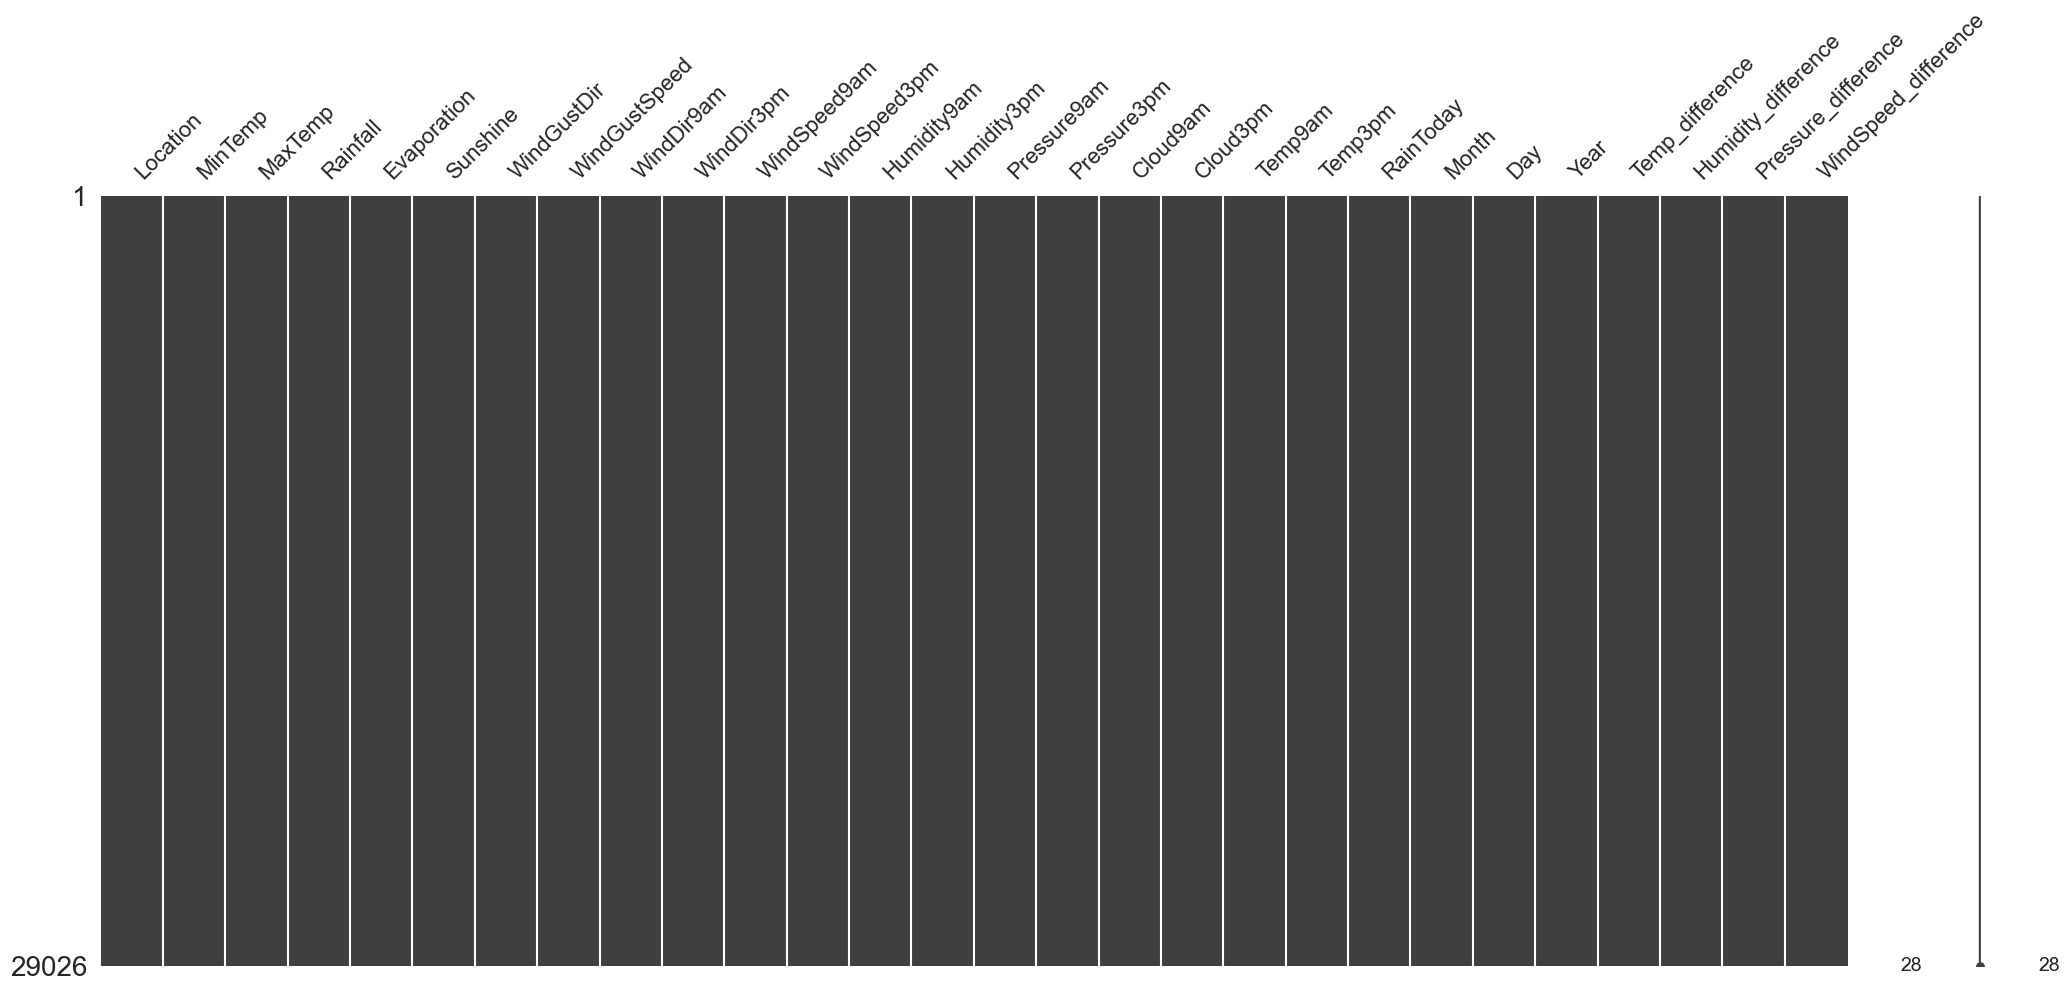

In [74]:
missing_data = create_missing_data_frame(X_train)
msno.matrix(X_train)
print(f'Shape of the data: {X_train.shape}')
missing_data

# CHECKING THE DISTRIBUTIONS CHANGES OF THE IMPUTATION

In order to validate the imputation of the numerical variables, appart from the metrics we can check the distributions of the variables before and after the imputation.

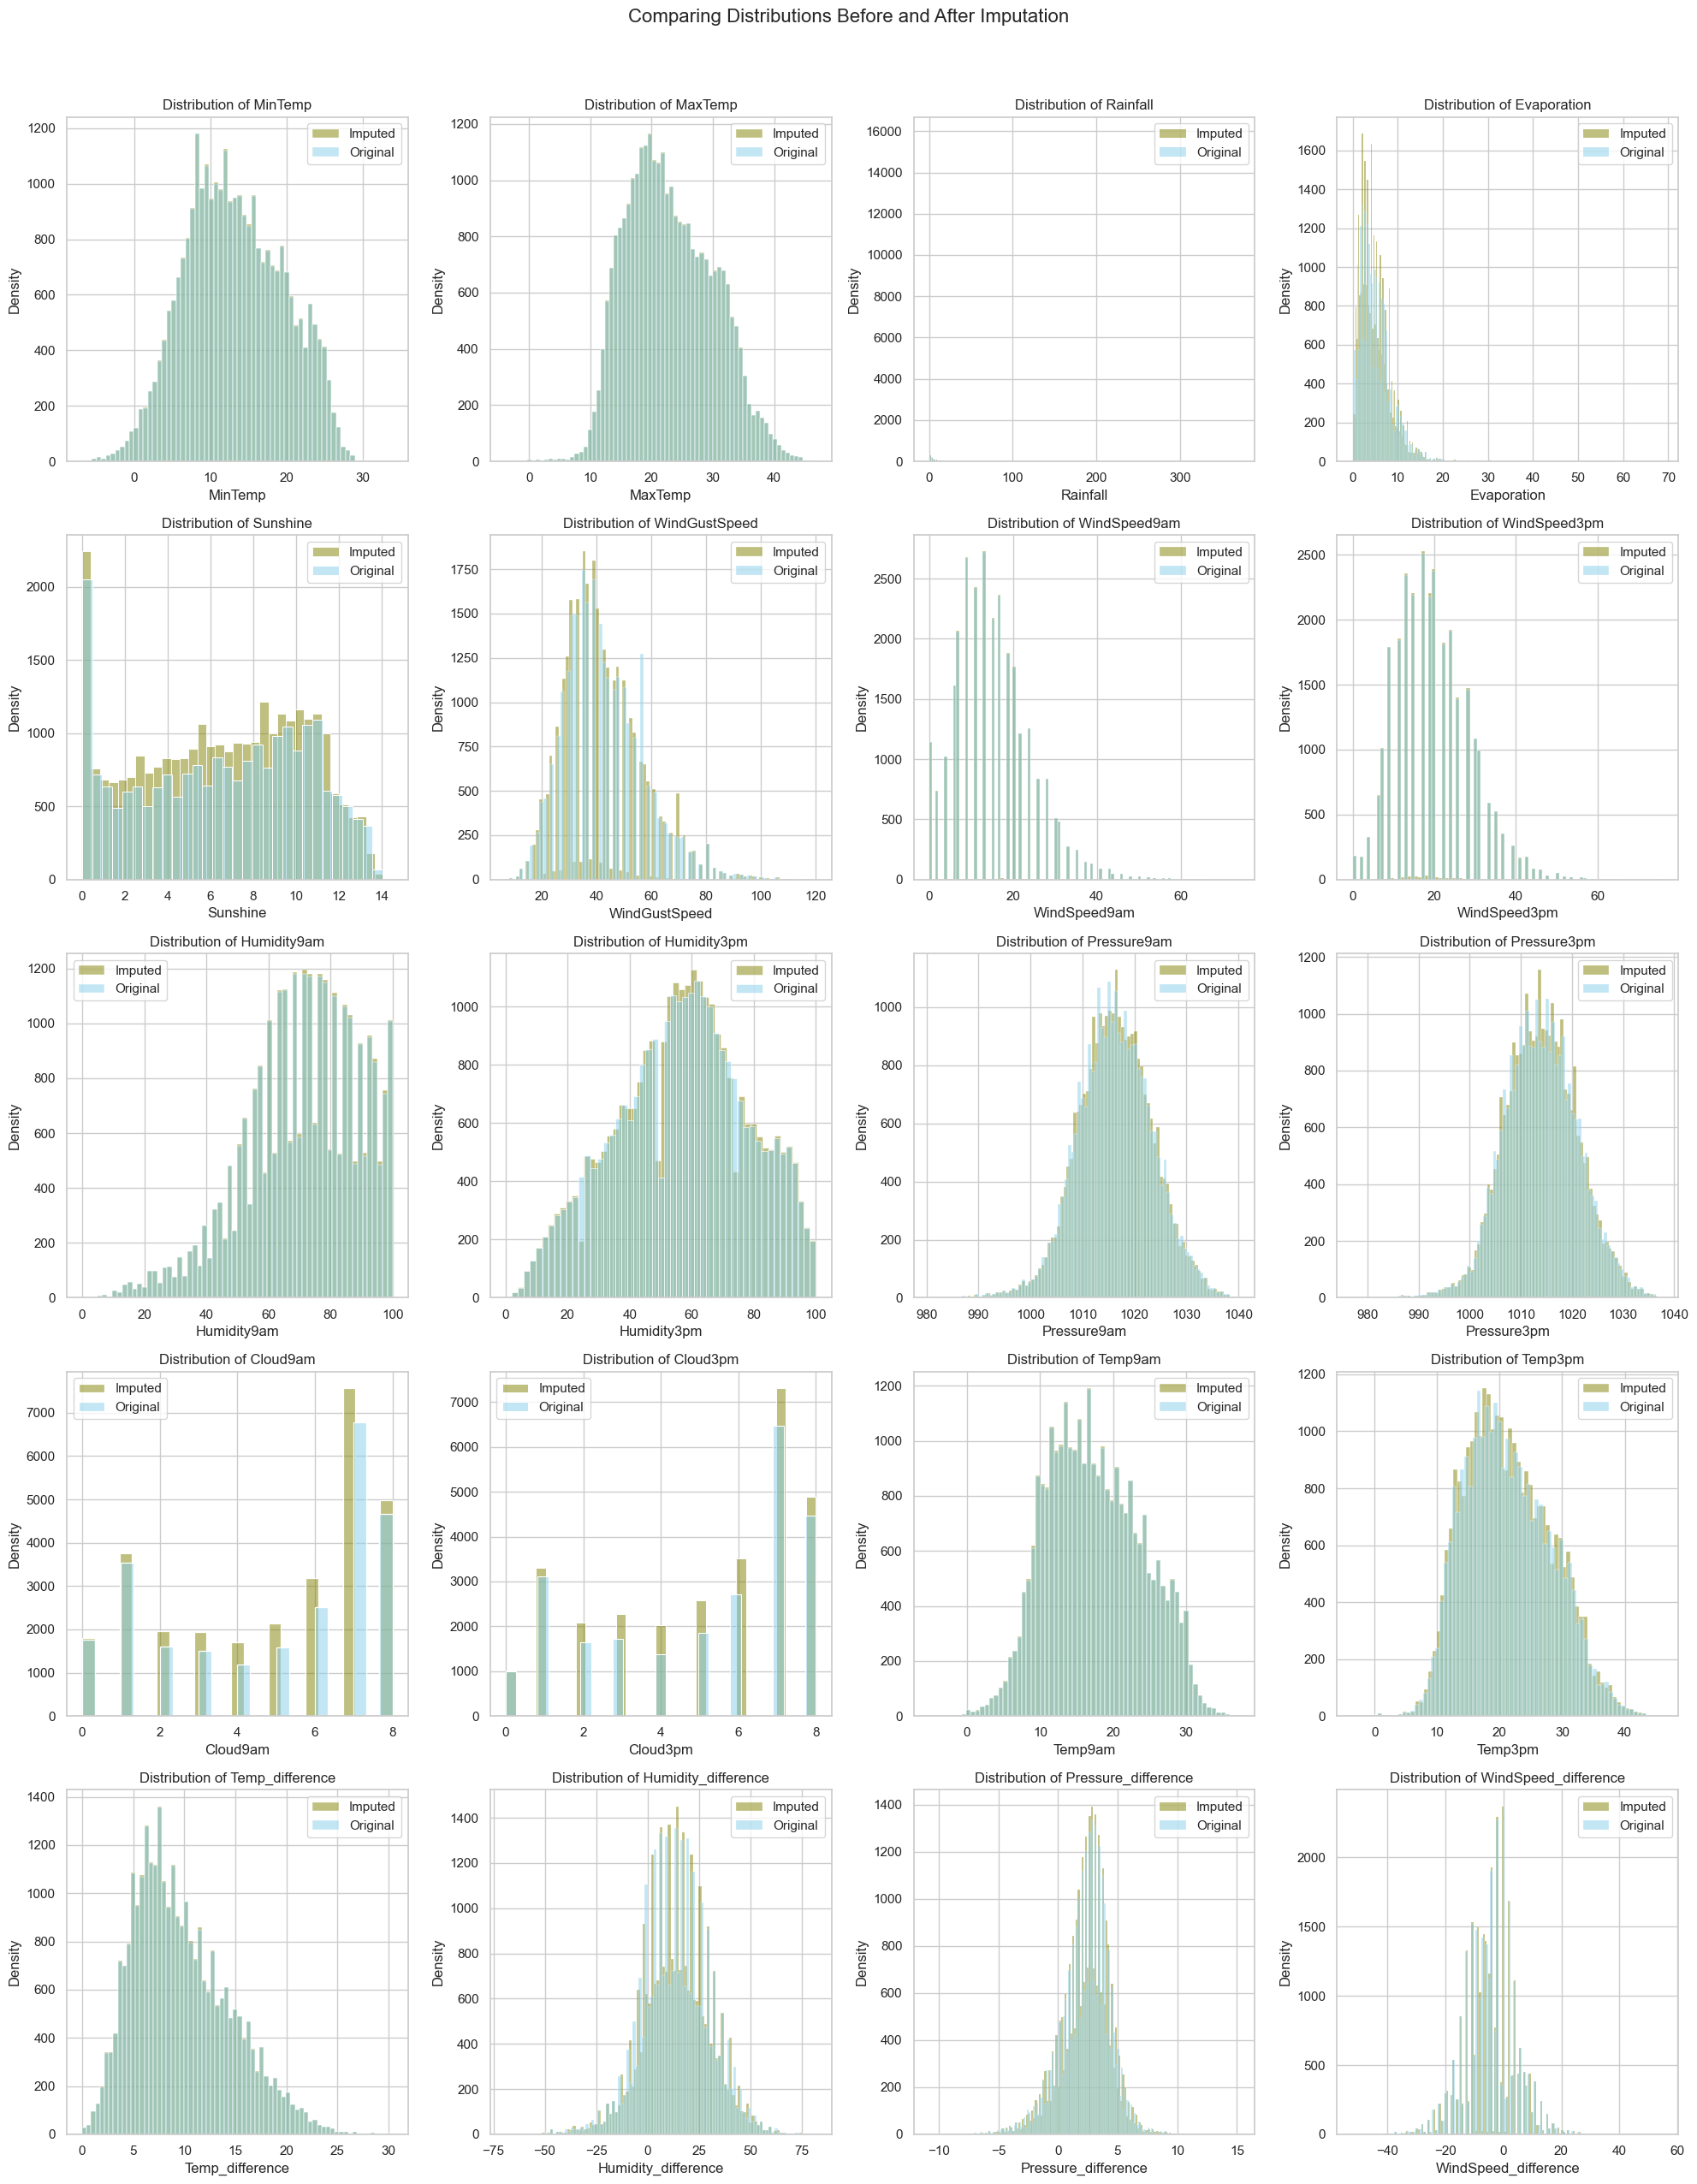

In [75]:
# Configuration of seaborn aesthetics for the plots
sns.set(style="whitegrid")


def compare_distributions(original_df, imputed_df):
    """
    Function to compare the distributions of the original and imputed data.

    Args:
    -------
    original_df: DataFrame containing the original data.
    imputed_df: DataFrame containing the imputed data.

    Returns:
    -------
    None
    """
    numerical_cols = original_df.select_dtypes(include=['int64', 'float64']).columns
    n_cols = len(numerical_cols)
    n_rows = max(n_cols // 4, 1)
    fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(20, 5 * n_rows))  # Adjust the size of the plot
    fig.suptitle('Comparing Distributions Before and After Imputation', fontsize=16, y=1.02)

    axes = axes.flatten()  # Flatten the 2D array of subplots

    # Iterate over the numerical columns and plot the distributions
    for ax, column in zip(axes, numerical_cols):
        sns.histplot(imputed_df[column], kde=False, color="olive", alpha=0.5, label='Imputed', ax=ax)
        sns.histplot(original_df[column], kde=False, color="skyblue", alpha=0.5, label='Original', ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Density')
        ax.legend()
    
    # Hide the empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Compare the distributions of the original and imputed data
compare_distributions(train_data.drop('RainTomorrow', axis=1), X_train)

# TRAINING MACHINE LEARNING MODELS

Creating a ColumnTransformer to apply different transformations to the numerical and categorical variables. In this case the numerical variables will be scaled and the categorical variables will be one hot encoded in order to be used in the models. This is done in order to avoid that variables with higher values have more importance in the models and to avoid that the models think that the categorical variables are ordinal.

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Selection of the categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Creation of the preprocessor with the StandardScaler for numerical variables and OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    verbose_feature_names_out=False
)

# TRAINING LOGISTIC REGRESSION MODELS

In this section we will train a Logistic Regression model to predict the RainTomorrow variable.

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters: {'classifier__C': 10, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Logistic Regression:
 Accuracy: 0.7907, ROC AUC: 0.88 , F1 Score: 0.79



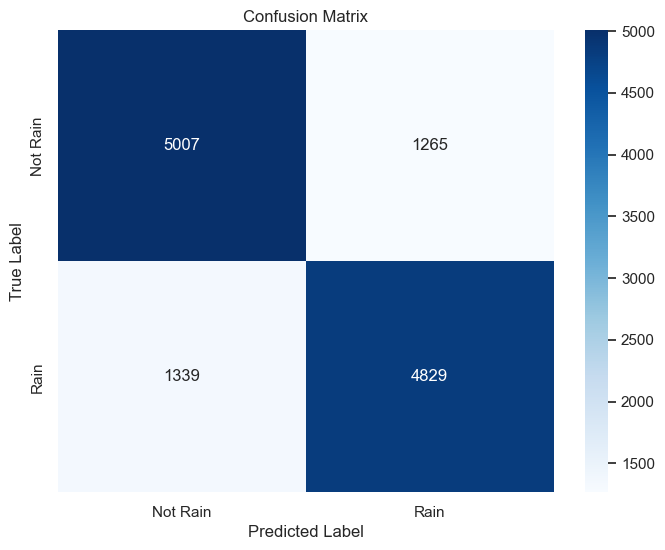

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

# Logistic Regression model

# Define the hyperparameters to tune
param_grid_lr = {
    'classifier__solver': ['liblinear'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__max_iter': [100, 350, 1000],
    'classifier__penalty': ['l1', 'l2'],
}

# Create the Logistic Regression model
LR_model = LogisticRegression(random_state=42)

# Define the pipeline in order to include the preprocessor and the classifier

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', LR_model)])

# Setup GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=pipeline, 
    param_grid=param_grid_lr, 
    cv=5,  # Number of cross-validation folds
    scoring='accuracy', 
    verbose=1  # For detailed logging information
)

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Best model's parameters
best_params_lr = grid_search_lr.best_params_
print("Best parameters:", best_params_lr)

# Best model
best_model = grid_search_lr.best_estimator_

# Predictions with the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression:\n Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.2f}", f", F1 Score: {f1:.2f}\n")


# Confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Rain', 'Rain'], yticklabels=['Not Rain', 'Rain'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Save the plot as an image
plt.savefig(f'../images/confusion_matrix_LR.png')
plt.show()

### PLOTTING THE RESULTS OF THE DIFFERENT COMBINATIONS OF HYPERPARAMETERS

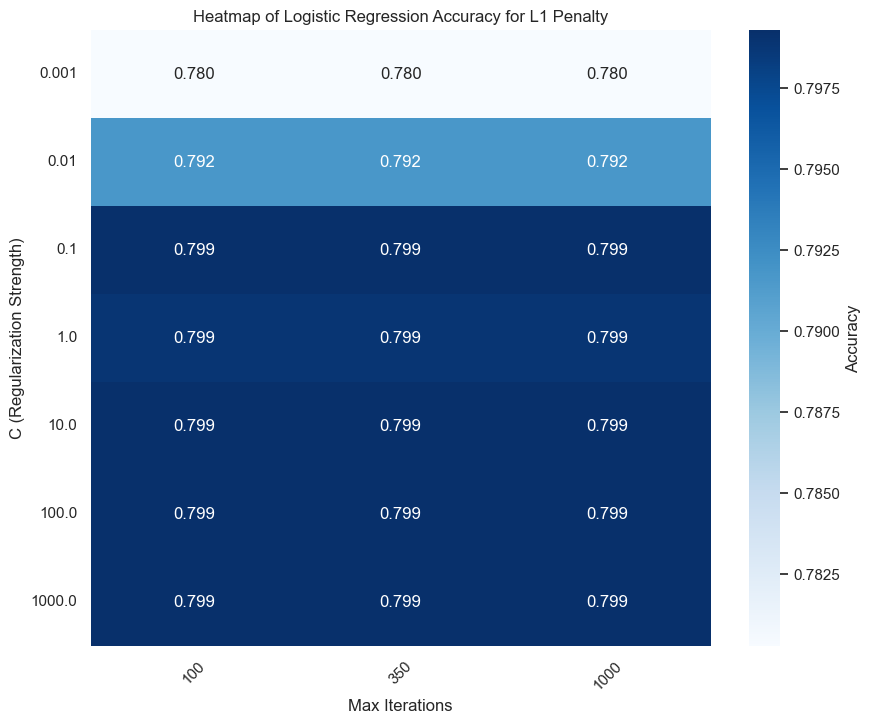

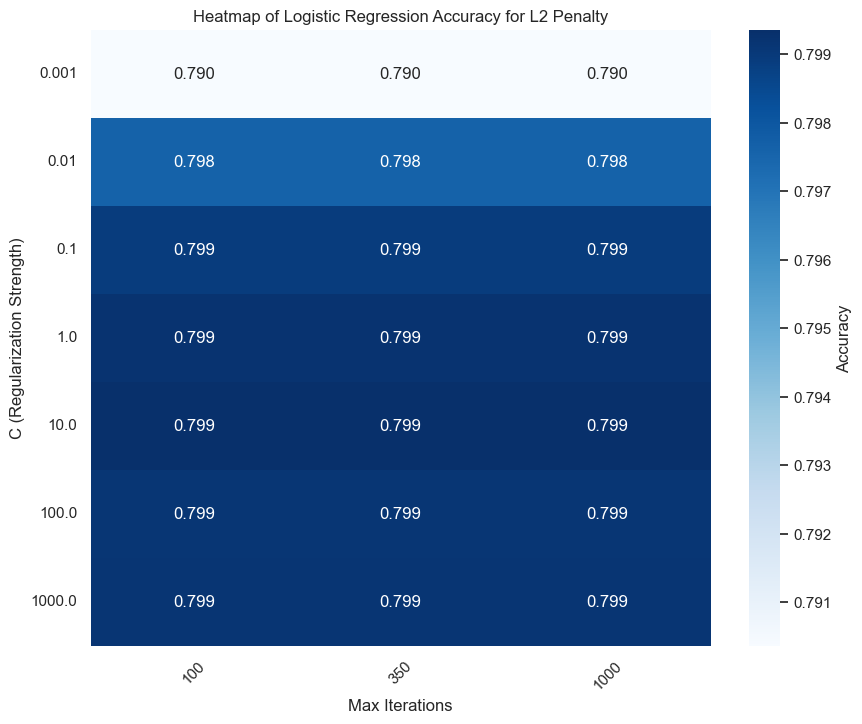

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Extract the results into a DataFrame
results = pd.DataFrame(grid_search_lr.cv_results_)

# Filter the results for each penalty type
results_l1 = results[results['param_classifier__penalty'] == 'l1']
results_l2 = results[results['param_classifier__penalty'] == 'l2']


def plot_accuracy_heatmap_combinations(results, title, file_name):
    """
    Function to plot a heatmap of the accuracy based on different combinations of hyperparameters.

    Args:
    -------
    results: DataFrame containing the results of the GridSearchCV
    title: Title of the plot
    file_name: Name of the file to save the plot

    Returns:
    -------
    None
    
    """
    # Pivot the DataFrame to create a matrix where rows are C values, columns are max_iter, and cells are accuracies
    results_pivot = results.pivot(index="param_classifier__C", columns="param_classifier__max_iter", values="mean_test_score")
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(results_pivot, annot=True, fmt=".3f", cmap='Blues', cbar_kws={'label': 'Accuracy'})
    plt.title(title)
    plt.xlabel('Max Iterations')
    plt.ylabel('C (Regularization Strength)')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # Save the plot as an image
    plt.savefig(f'../images/{file_name}.png')
    plt.show()

# Plot heatmap for L1 Penalty
plot_accuracy_heatmap_combinations(results_l1, title='Heatmap of Logistic Regression Accuracy for L1 Penalty', file_name='heatmap_l1')

# Plot heatmap for L2 Penalty
plot_accuracy_heatmap_combinations(results_l2, 'Heatmap of Logistic Regression Accuracy for L2 Penalty', file_name='heatmap_l2')



# TRAINING NN MODELS

Creating a function to train a Neural Network model with different hyperparameters.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

def train_and_evaluate_nn(create_model_function, X_train, y_train, X_test, y_test, epochs=100, batch_size=32, validation_split=0.2, use_early_stopping=False, number_iterations=10, title='Neural Network Training Results'):
    """
    Trains a neural network model, evaluates it on the test set, and visualizes the training process and results.

    Args:
    -------
    create_model_function: Function that creates a neural network model
    X_train: Training features
    y_train: Training target
    X_test: Test features
    y_test: Test target
    epochs: Number of epochs for training
    batch_size: Batch size for training
    validation_split: Fraction of training data to use as validation
    use_early_stopping: Whether to use early stopping
    number_iterations: Number of iterations to train the model
    title: Title of the plots

    Returns:
    --------
    best_model: The best model based on the highest accuracy
    best_model_history: The history of the best model
    """

    models = []
    histories = []
    accuracies = []
    f1_scores = []
    conf_matrices = []

    for i in range(number_iterations):
        print(f"Iteration: {i + 1}/{number_iterations}")
        
        # Create a new model for each iteration
        new_model = create_model_function()

        callbacks = []
        if use_early_stopping:
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            callbacks.append(early_stopping)
        
        history = new_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                            validation_split=validation_split, callbacks=callbacks, verbose=1)
        
        # Evaluating the model on the test set
        y_pred_prob = new_model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int)
        test_accuracy = accuracy_score(y_test, y_pred)
        test_f1_score = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Append the results to the lists
        models.append(new_model)
        histories.append(history)
        accuracies.append(test_accuracy)
        f1_scores.append(test_f1_score)
        conf_matrices.append(conf_matrix)

    # Calculate the mean and standard deviation of the results
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)

    mean_f1_score = np.mean(f1_scores)
    std_f1_score = np.std(f1_scores)

    conf_matrix = np.mean(conf_matrices, axis=0).astype(int)

    print(f"Mean Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
    print(f"Mean F1 Score: {mean_f1_score:.4f} +/- {std_f1_score:.4f}")

    # Find the model with the highest accuracy

    max_accuracy_index = np.argmax(accuracies)
    best_model = models[max_accuracy_index]
    best_model_history = histories[max_accuracy_index]
    best_model_conf_matrix = conf_matrices[max_accuracy_index]

    # Plotting accuracy and loss for the best model
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 2, 1)
    plt.plot(best_model_history.history['accuracy'], label='Train Accuracy')
    plt.plot(best_model_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(best_model_history.history['loss'], label='Train Loss')
    plt.plot(best_model_history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Save the plot as an image
    plt.savefig(f'../images/epochs_{title}.png')
    plt.show()
    

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(best_model_conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Rain', 'Rain'], yticklabels=['Not Rain', 'Rain'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    # Save the plot as an image
    plt.savefig(f'../images/confusion_matrix_{title}.png')
    plt.show()

    return best_model, best_model_history



# Transforming the data using the preprocessor and converting it to a numpy array
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_transformed = pipeline.fit_transform(X_train).toarray()
X_test_transformed = pipeline.transform(X_test).toarray()


## NN with only one layer and SIGMOID activation function
Creating a Neural Network with only one layer and the sigmoid activation function which is the same as the logistic regression model (without hyperparameters).

Iteration: 1/3
Epoch 1/250
182/182 [==============================] - 0s 694us/step - loss: 0.6825 - accuracy: 0.5702 - val_loss: 0.6042 - val_accuracy: 0.6783
Epoch 2/250
182/182 [==============================] - 0s 380us/step - loss: 0.5696 - accuracy: 0.7158 - val_loss: 0.5330 - val_accuracy: 0.7384
Epoch 3/250
182/182 [==============================] - 0s 379us/step - loss: 0.5188 - accuracy: 0.7519 - val_loss: 0.4992 - val_accuracy: 0.7582
Epoch 4/250
182/182 [==============================] - 0s 372us/step - loss: 0.4924 - accuracy: 0.7665 - val_loss: 0.4807 - val_accuracy: 0.7680
Epoch 5/250
182/182 [==============================] - 0s 385us/step - loss: 0.4768 - accuracy: 0.7739 - val_loss: 0.4692 - val_accuracy: 0.7757
Epoch 6/250
182/182 [==============================] - 0s 375us/step - loss: 0.4665 - accuracy: 0.7791 - val_loss: 0.4613 - val_accuracy: 0.7804
Epoch 7/250
182/182 [==============================] - 0s 371us/step - loss: 0.4591 - accuracy: 0.7826 - val_loss: 

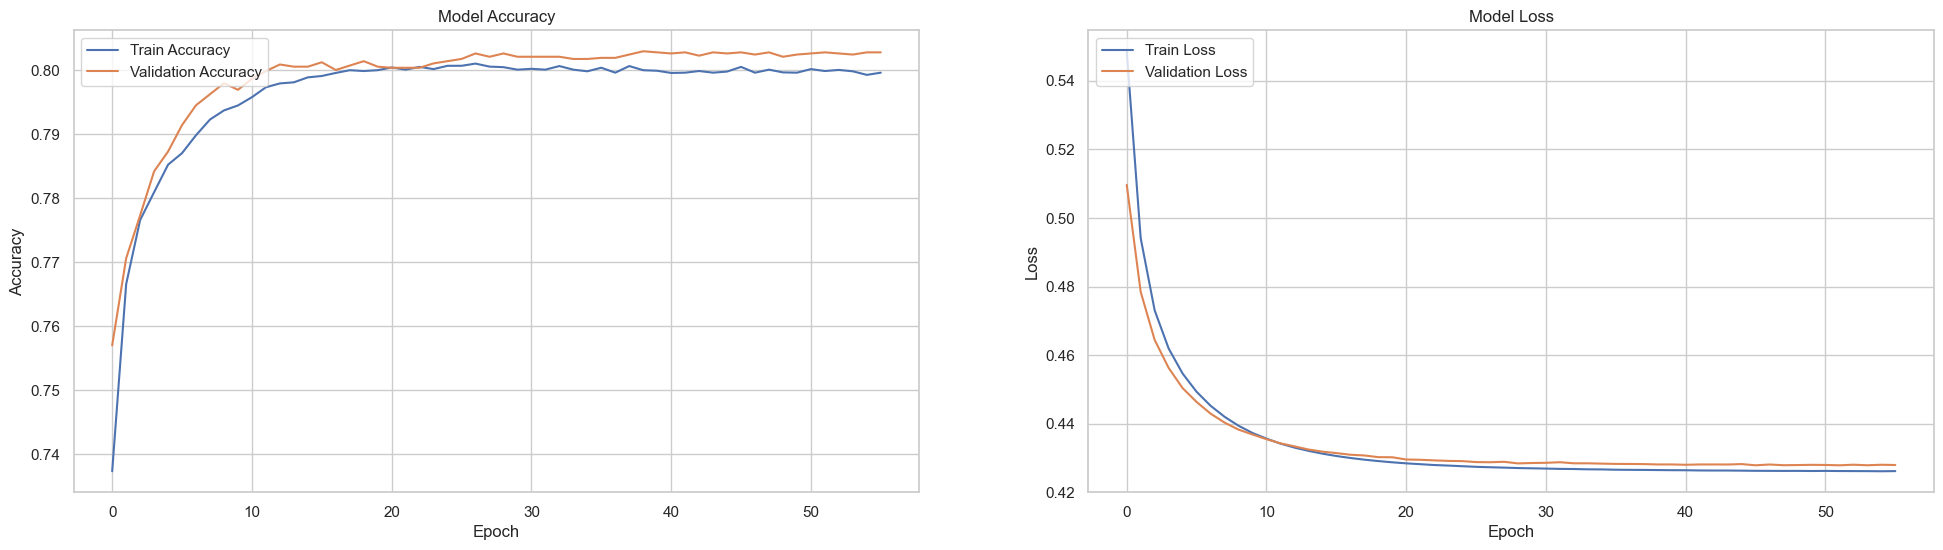

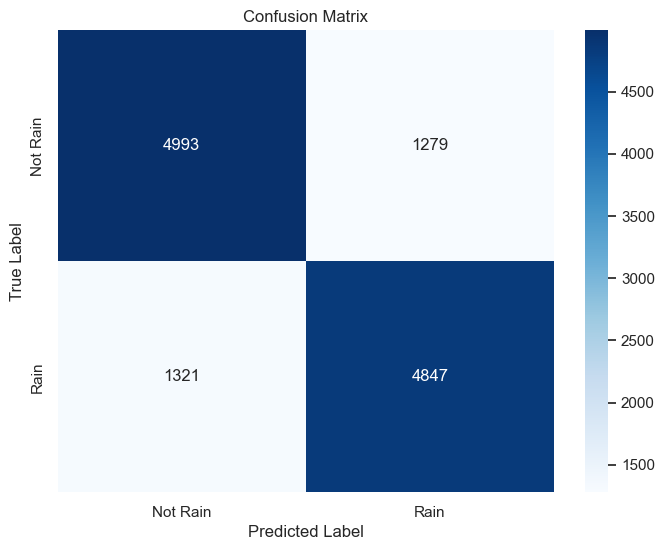

In [80]:
# Build and compile the neural network model wih only one layer and sigmoid activation function

def create_single_layer_model():
    model = Sequential([Dense(1, activation='sigmoid')])
    model.compile(optimizer=legacy.Adam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and visualize the model
model, history = train_and_evaluate_nn(create_single_layer_model, X_train_transformed, y_train, X_test_transformed, y_test, epochs=250, batch_size=128, use_early_stopping=True, number_iterations=3, title='one_layer_sigmoid')

As we can see the accuracy is very similar to the one of the logistic regression model.

## More complex NN structure

Creating a more complex Neural Network with more layers and more neurons in order to see if the model can learn more complex patterns. We will also uso regularization and dropout to avoid overfitting.

Iteration: 1/10
Epoch 1/250
155/155 [==============================] - 1s 3ms/step - loss: 1.2309 - accuracy: 0.6669 - val_loss: 1.0125 - val_accuracy: 0.7823
Epoch 2/250
155/155 [==============================] - 0s 2ms/step - loss: 1.0496 - accuracy: 0.7455 - val_loss: 0.9281 - val_accuracy: 0.7918
Epoch 3/250
155/155 [==============================] - 0s 2ms/step - loss: 0.9469 - accuracy: 0.7672 - val_loss: 0.8571 - val_accuracy: 0.7957
Epoch 4/250
155/155 [==============================] - 0s 2ms/step - loss: 0.8687 - accuracy: 0.7749 - val_loss: 0.7949 - val_accuracy: 0.8009
Epoch 5/250
155/155 [==============================] - 0s 1ms/step - loss: 0.8035 - accuracy: 0.7823 - val_loss: 0.7419 - val_accuracy: 0.8033
Epoch 6/250
155/155 [==============================] - 0s 2ms/step - loss: 0.7476 - accuracy: 0.7871 - val_loss: 0.6960 - val_accuracy: 0.8042
Epoch 7/250
155/155 [==============================] - 0s 3ms/step - loss: 0.7007 - accuracy: 0.7895 - val_loss: 0.6554 - val_

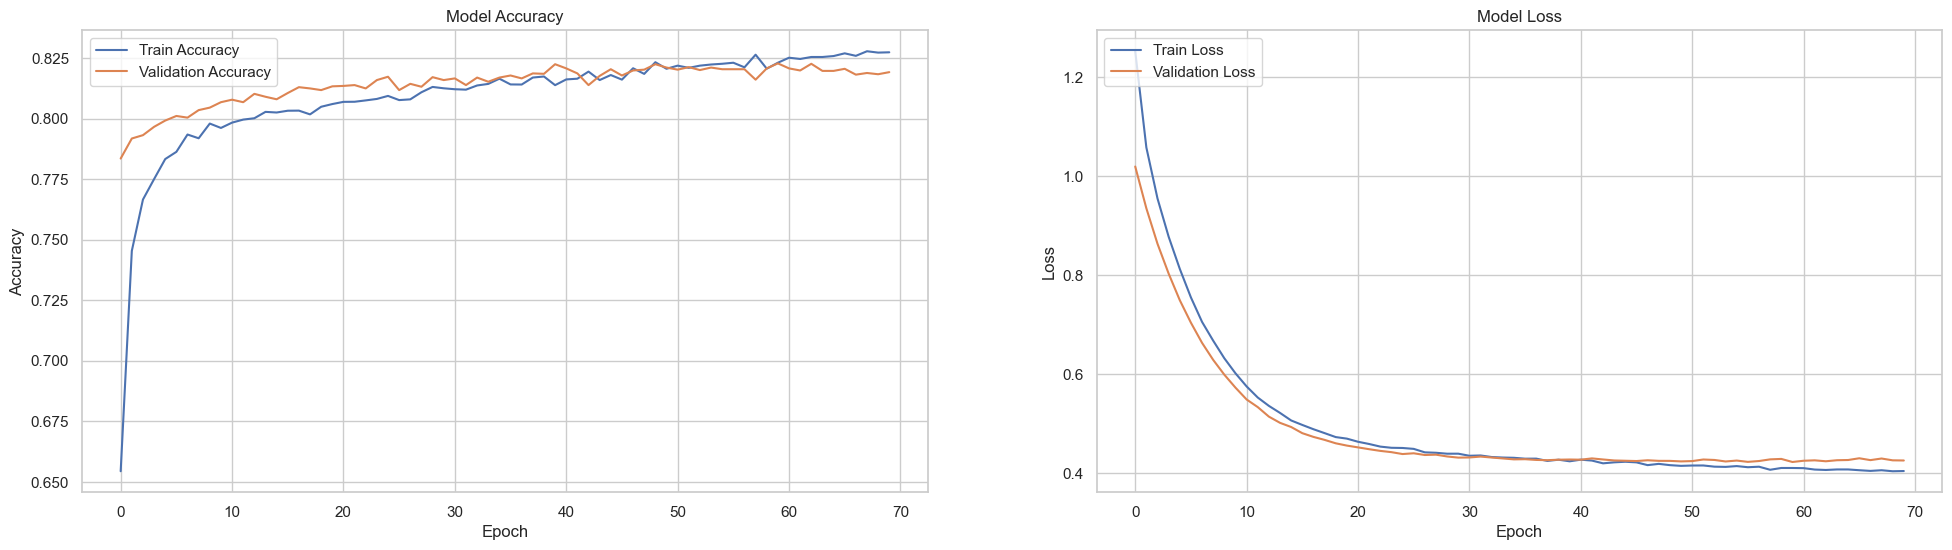

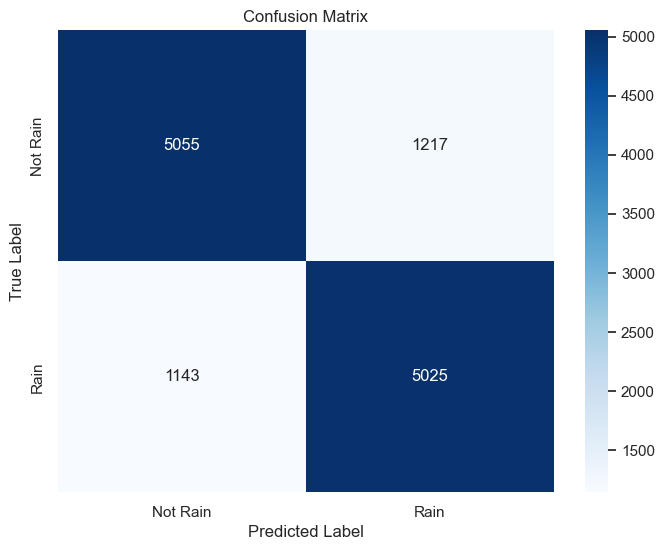

In [81]:
# Configuration of the neural network model

from tensorflow.keras.regularizers import l2


def create_advanced_model_with_regularization():
    model = Sequential([
        Dense(128, input_dim=X_train_transformed.shape[1], kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(128, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(64, kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=legacy.Adam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and visualize the model
model, history = train_and_evaluate_nn(create_advanced_model_with_regularization, X_train_transformed, y_train, X_test_transformed, y_test, epochs=250, batch_size=150, use_early_stopping=True, title='advanced_model')